# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#Global Variables 
bold_start = '\033[1m' 
bold_end = '\033[0m'

In [2]:
#Usefull function of the next parts 
def hex_to_rgb(value):
    '''
    This function converts the hex encoding of the color to RGB values. 
    '''
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [3]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [4]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [5]:
lego_colors_df = pd.read_csv(LEGO_DATA_FOLDER + '/colors.csv.zip')
lego_inventories_df = pd.read_csv(LEGO_DATA_FOLDER + '/inventories.csv.zip')
lego_inventory_parts_df = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_parts.csv.zip')
lego_inventories_sets_df = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_sets.csv.zip')
lego_part_categories_df = pd.read_csv(LEGO_DATA_FOLDER + '/part_categories.csv.zip')
lego_parts_df = pd.read_csv(LEGO_DATA_FOLDER + '/parts.csv.zip')
lego_sets_df = pd.read_csv(LEGO_DATA_FOLDER + '/sets.csv.zip')
lego_themes_df = pd.read_csv(LEGO_DATA_FOLDER + '/themes.csv.zip')

print("All csv files in the data/lego folder were uploaded succesfully!")

All csv files in the data/lego folder were uploaded succesfully!


### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [6]:
### FIND THE DATA TO CLEAN
print(bold_start+'Summary of the Sets DataFrame'+bold_end)
print(lego_sets_df.info(), '\n')

print(bold_start+'All unique elements of the year column in the sets DataFrame'+bold_end)
print('Mean of number of nan in the columns: ',lego_sets_df.year.isnull().mean())
print(np.unique(lego_sets_df.year))
print(bold_start+'Conclusion: Data contains 3 types of errors : decades, negative sign in front of the year and the additionnal digit '+bold_end, '\n')

### CLEANING PART ###
print(bold_start + 'Cleaning Begins' + bold_end + '\n')

#solve issue 1: Remove Data per decades 
print('Decades Removal: ')
print('Size before: ', lego_sets_df.size)
lego_sets_df = lego_sets_df[lego_sets_df.year.str.contains('s') == False]
lego_sets_df.year = lego_sets_df.year.apply(pd.to_numeric)
print('Size after: ', lego_sets_df.size)

#solve issue 2: Negative Dates 
lego_sets_df.year = lego_sets_df.year.abs()
print('\nNegatives Correction: Done\n')

#solve issue 3: Additionnal digit 
tmp_df = lego_sets_df[lego_sets_df.year > 2017].copy()
tmp_df.year = tmp_df.year.astype(str).str[:-1].astype(np.int64)
lego_sets_df = pd.concat([lego_sets_df[lego_sets_df.year <= 2017], tmp_df])

print('Here you can see all unique elements of an the columns after the cleaning process. There is no more inconsistencies')
print(np.unique(lego_sets_df.year))

### QUESTIONS PART ###
print('\n' + bold_start + 'ANSWERS TO THE QUESTIONS' + bold_end)
print('What is the time range of the sets?')
print('     Answer: Min =', lego_sets_df.year.min(), 'Max =', lego_sets_df.year.max(), 'Range =', lego_sets_df.year.max() - lego_sets_df.year.min(), 'years')

lego_inventory_parts_df = lego_inventory_parts_df[lego_inventory_parts_df.quantity > 0] #make sure that all the quantities are greater then 0

print('What is the average quantity of the inventory parts?')
print('     Answer: The average quantity of the inventory parts is', lego_inventory_parts_df.quantity.mean(), 'parts.')

Summary of the Sets DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 5 columns):
id           11673 non-null object
name         11673 non-null object
year         11673 non-null object
theme_id     11673 non-null int64
num_parts    11673 non-null int64
dtypes: int64(2), object(3)
memory usage: 456.1+ KB
None 

All unique elements of the year column in the sets DataFrame
Mean of number of nan in the columns:  0.0
['-1962' '-1966' '-1969' '-1971' '-1973' '-1975' '-1977' '-1979' '-1980'
 '-1981' '-1982' '-1983' '-1984' '-1985' '-1986' '-1987' '-1988' '-1989'
 '-1991' '-1992' '-1993' '-1994' '-1995' '-1996' '-1997' '-19977' '-1998'
 '-1999' '-19999' '-2000' '-20000' '-2001' '-20011' '-2002' '-20022'
 '-2003' '-20033' '-2004' '-20044' '-2005' '-2006' '-20066' '-2007'
 '-20077' '-2008' '-2009' '-20099' '-2010' '-20100' '-2011' '-20111'
 '-2012' '-20122' '-2013' '-20133' '-2014' '-20144' '-2015' '-20155'
 '-2016' '-20166' '-2017' '1950

__\* Briefly explain your approach here \*__

- sets.csv: there are many incoherences in the dataset. 
    - one could observe *negative dates*
    - sometimes the date was given as a *decade* (eg. 70s) --> data is not usuable since the data is hashed per year and not decade. Moreover, by supressing it we don't loose a lot of data. However, we could keep in the back of our head that if we analyse data per decade we could use them. 
    - Furthermore, sometimes by mistake, the user *added an additional digit* (eg. 19955 instead of 1995) 
    - Finally, In some other cases, *several mistakes were combined* (eg. -19966)

- inventory parts.csv: 
    - Some of the invetory parts had a quantity of -oo which is obsviously not possible. Therefore, all the data of quantity bellow 0 was removed. 

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

PART A3.1
Number of lines found with car in the name: 136
Number of lines found with race car ra  in the name and with the previous lines found:  213
Number of lines found with red race car  in the name and with the previous lines found:  214
Number of lines found with Spider-Car  in the name and with the previous lines found:  215
Number of lines found with lightning McQ  in the name and with the previous lines found:  218
Number of lines found with Adventurers Car  in the name and with the previous lines found:  219
Number of train related false positive found:  3
Number of false positive found with rail  in the name and with the previous false positive found:  6
Number of false positive found with double-stack  in the name and with the previous false positive found:  7
Number of false positive found with Sleeping Car  in the name and with the previous false positive found:  8
Number total of the inventories that belong to sets that contain cars:  219
PART A3.2


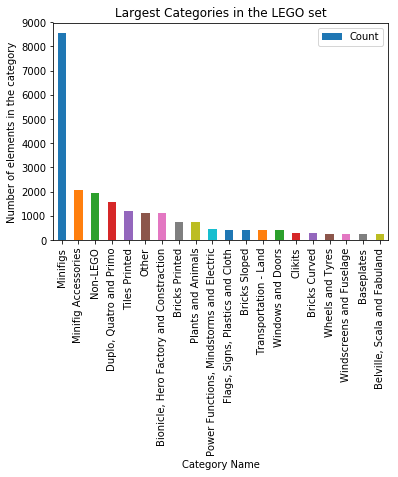

PART A3.3


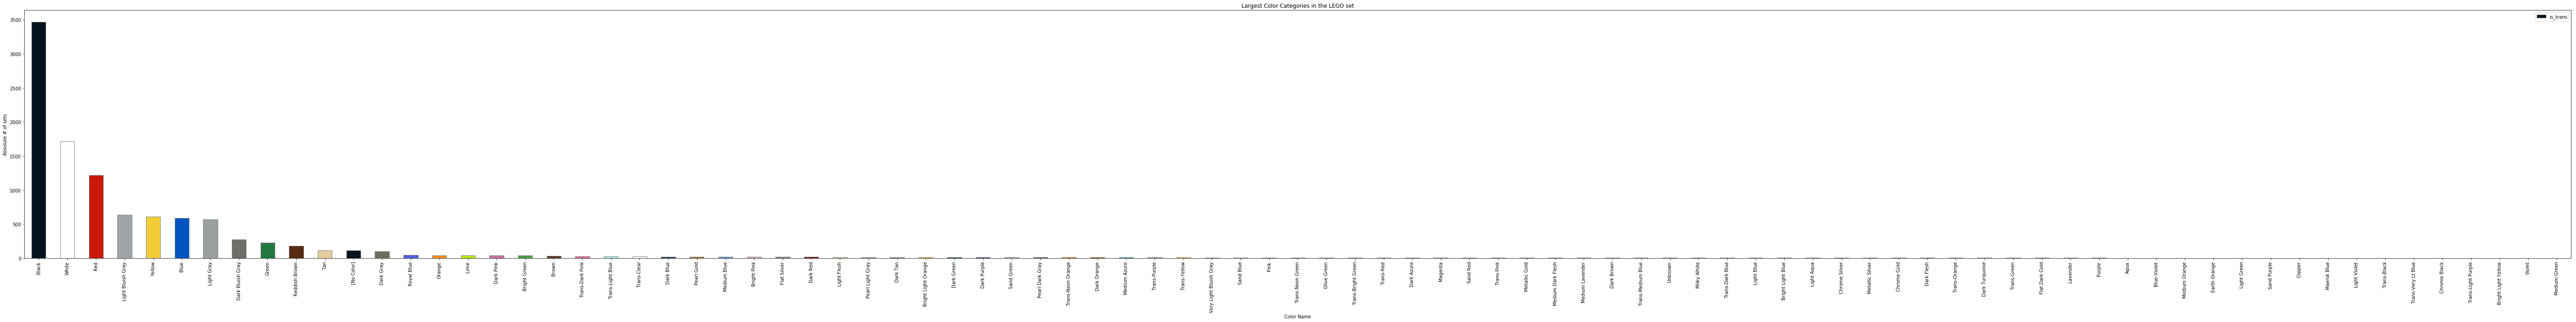

PART A3.4
shape in A (10595, 12)
shape in B (187, 14)
shape in C (184, 18)
shape in D (4, 18)


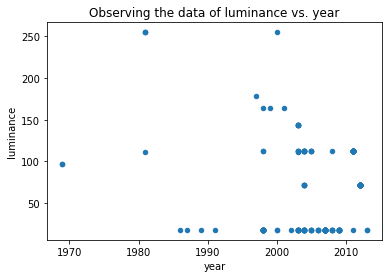

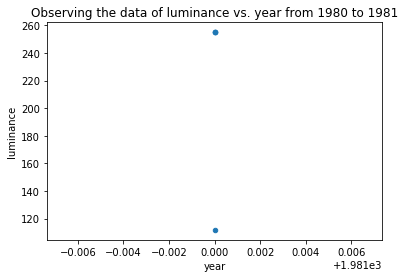

In [7]:
### A3.1 ###
print('\033[1m' + 'PART A3.1' + '\033[0m')

cars_find = lego_sets_df[lego_sets_df.name.str.slice(start=-3).str.contains('car', case=False)]
print('Number of lines found with car in the name:', cars_find.name.size)

car_synonyms_from_dictionnary = ['van', 'camper','buggy', 'cars']
for i in car_synonyms_from_dictionnary: 
    cars_find = cars_find.append(lego_sets_df[lego_sets_df.name.str.slice(start=-len(i)).str.contains(i, case=False)])
    
#this time we do not look at the end but in the whole name since the query is more specific. 
#the last 3 characters were ignored in order to ignore the ids already found. 
car_types = ['race car ra', 'red race car', 'Spider-Car', 'lightning McQ','Adventurers Car']
for i in car_types: 
    cars_find = cars_find.append(lego_sets_df[lego_sets_df.name.str.slice(start=0, stop=-3).str.contains(i, case=False)])
    print('Number of lines found with',i,' in the name and with the previous lines found: ', cars_find.name.size)

#remove the train cars which are false positives 
train_find = cars_find[cars_find.name.str.contains('train', case=False)]
print('Number of train related false positive found: ', train_find.name.size)

train_lexical_field = ['rail', 'double-stack', 'Sleeping Car']
for i in train_lexical_field: 
    train_find = train_find.append(cars_find[cars_find.name.str.contains(i, case=False)])
    print('Number of false positive found with',i,' in the name and with the previous false positive found: ', train_find.name.size)
    
#do an outer_merge 
cars_cleaned_df = pd.merge(cars_find, train_find, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
print('Number total of the inventories that belong to sets that contain cars: ', cars_find.name.size)

### A3.2 ###
print(bold_start+'PART A3.2'+bold_end)
part_groups = lego_parts_df.groupby('part_cat_id').count()
part_groups = part_groups.sort_values('id', ascending=False)
part_groups = part_groups.reset_index()
part_groups = part_groups[0:20] #select only the 20 best categories

#find the names of the categories 
lego_part_categories_df_renamed = lego_part_categories_df.rename(index=str, columns={"id": "part_cat_id"})

#largest_categories = part_groups.part_cat_id.values
largest_categories_merged = pd.merge(part_groups, lego_part_categories_df_renamed, on='part_cat_id')
largest_categories_merged = largest_categories_merged.rename(index=str, columns={"name_x": "Count", "name_y": "Category"})

largest_categories_merged.plot.bar(x='Category', y='Count', title="Largest Categories in the LEGO set", legend=True) #contains the 20 largest categories 
plt.xlabel('Category Name')
plt.ylabel('Number of elements in the category')
plt.show()

### A3.3 ###
print(bold_start+'PART A3.3'+bold_end)

part_inventory_groups_by_colorID = lego_inventory_parts_df.copy()
keys_in_df = lego_inventory_parts_df.groupby('inventory_id').groups.keys() #find the keyname of all the groups
color_id_of_most_elements = []

for i in keys_in_df: 
    group = lego_inventory_parts_df.groupby('inventory_id').get_group(i)
    color_id_of_most_elements.append(group.groupby('color_id').count().idxmax()[0])  

d = {'color_id': color_id_of_most_elements}
most_frequent_index = pd.DataFrame(data=d)

#find the names of the categories 
lego_colors_df_renamed = lego_colors_df.rename(index=str, columns={"id": "color_id"})
largest_color_categories_merged = pd.merge(most_frequent_index, lego_colors_df_renamed, on='color_id', how = 'left')
largest_color_categories_merged['rgb'] = '#' + largest_color_categories_merged['rgb'].astype(str)

count_colors = largest_color_categories_merged.groupby(['color_id', 'rgb', 'name']).count()
count_colors = count_colors.reset_index()
count_colors = count_colors.sort_values('is_trans', ascending = False)

count_colors.plot.bar(x='name', y='is_trans', title="Largest Color Categories in the LEGO set", legend=True, color=count_colors.rgb.values, figsize=(100,10), edgecolor = 'grey')
plt.xlabel('Color Name')
plt.ylabel('Absolute # of sets')
plt.show()

### A3.4 ###
print(bold_start+'PART A3.4'+bold_end)

###PART A : Putting all the color related informations together 
'''UNCOMMENT THIS IF YOU WANT TO USE THE DOMINANT COLOR FOR ALL SETS'''
'''unique_sets_dominant_color = pd.merge(lego_inventory_parts_df, lego_colors_df_renamed, on='color_id')
unique_sets_dominant_color['rgb'] = '#' + unique_sets_dominant_color['rgb'].astype(str) #merges the color information if the hex RGB code '''

# Computes the luminance of the dominant color of the set 
unique_sets_dominant_color = lego_inventory_parts_df.drop_duplicates('inventory_id')
unique_sets_dominant_color = unique_sets_dominant_color.assign(dominant_color_id = largest_color_categories_merged.color_id.values, rgb = largest_color_categories_merged.rgb.values, name_dominant = largest_color_categories_merged.name.values)

RGB_colors = unique_sets_dominant_color.rgb.apply(hex_to_rgb)

R = []
G = []
B = []
luminance = []

for r, g, b in RGB_colors: 
    R.append(r)
    G.append(g)
    B.append(b)
    luminance.append(np.sqrt(0.299*r*r + 0.587*g*g + 0.114*b*b))
    
unique_sets_dominant_color = unique_sets_dominant_color.assign(R = R, G = G, B = B, luminance = luminance)
print('shape in A', unique_sets_dominant_color.shape)

###PART B : Putting all the set_id and the inventory_id together. 
categories_merged = pd.merge(lego_inventories_sets_df, unique_sets_dominant_color, on='inventory_id')
print('shape in B', categories_merged.shape)

###PART C: Putting the date of creation of each element
lego_set_df_renamed = lego_sets_df.rename(index=str, columns={"id": "set_id"})
categories_merged = pd.merge(categories_merged, lego_set_df_renamed, on='set_id')
categories_merged.plot.scatter(x='year', y ='luminance', title = 'Observing the data of luminance vs. year')
print('shape in C', categories_merged.shape)

### PART D: Looking at the data from 1980 to 1981 
categories_merged_1980 = categories_merged[categories_merged.year > 1979]
categories_merged_1980 = categories_merged_1980[categories_merged_1980.year <= 1981]
categories_merged_1980.plot.scatter(x='year', y ='luminance', title = 'Observing the data of luminance vs. year from 1980 to 1981')
print('shape in D', categories_merged_1980.shape)

#### Interpretation: 
We see that we only have a few data in the end. The data for 1981 is inexitant whereas the data we have 4 points for 1980. By checking manually in the source files, we see that especially in the part where we match the inventory IDs (shape in A to Shape in B) we loose a lot of data. This is due to the fact that many IDs are not in present in both lists and not because we made a mistake in handling the data. 

__\* Briefly explain your approach for every query here \*__
#### 1 - List the ids of the inventories that belong to sets that contain cars.
    - The group chose to look for synonyms of cars and the name car it self. We had to look for the word "car" and not the three strings "car" since this could lead to false positives (eg. CARrousel). If we wanted to find all the 4-wheeled motorized elements of the list, one could have defined a car_synonyms_from_dictionnary = ['car', 'cars', 'truck', 'caravan', 'camper', 'van', 'buggy', 'tanker', 'transporter'] and iterated over this list and check if the sets_df contains these terms. However, we were asked to look for cars not trucks or tankers. 
    
#### 2 - Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories 
    - We had to look in the file "parts" and "parts_categories". From parts_categories it was possible to retrieve the name of the categories whereas the amount of each category was determined by looking at the "parts" file. After determining the 20 largest categories it was possible to merge the information of both files in order to show the name of the categories (and not the IDs) on the bar chart. 
 
#### 3 - Inventory parts 
    - The information about the color_id is in the inventory_part file. The pipline of data cleaning and selection is close to the one done in question 2 (just above).  The information is split between two files and we had to merge two dataframes in order to put the information together. However, it was a bit more difficult to get the data we wanted. In a first time the data was grouped by inventory_id (other name to say sets - one category is one set, only the IDs are different). Once this was done we could find the dominant colot for each set. Then, the color_id was merged, as mentionned above with the color name, rgb code, etc. Finally, once this was done it was necessary to indicate, in the right order, the color to plot on the bar chart in order to match color on the bar and color name to show. (NOTE: If the plot is too small you can double click on it and a zoomed version appears) 
    
#### 4 - Luminance Accross the decades. 
    - The information about the first commercialisation of a given lego piece is stored in the set file, whereas the color information is in the inventory_parts file. Once again it was necessary to gather the information from both file to one single file. However, in this case, it was a bit more difficult in the sense that we had to put together the information from three files. The color_id is in inventory part, whereas the actual meaning of the color_id was in the color file. Nevertheless, we saw that only 15 of all the IDs were presented in both files. This lead only to a few data for the years 1980 anf 1981. For 1981, we have no data. 

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [8]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [9]:
bikes_metro_df = pd.read_json(BIKES_DATA_FOLDER + '/metro-bike-share-trip-data.json', orient='columns')
print("JSON file in the data/bikes folder was uploaded succesfully!")

JSON file in the data/bikes folder was uploaded succesfully!


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [10]:
print(bold_start+'Initial Attribute Types - RAW DATA' + bold_end)
print(bikes_metro_df.dtypes)
print('\n')

#Remove the NaNs
bikes_metro_df.dropna(inplace=True)

#convert the columns containning dates to the datetime type
bikes_metro_df['Start Time'] = pd.to_datetime(bikes_metro_df['Start Time'])
bikes_metro_df['End Time'] = pd.to_datetime(bikes_metro_df['End Time'])

### CATEGORICAL ATTRIBUTES ###
bikes_metro_df['Passholder Type'] = bikes_metro_df['Passholder Type'].astype('category')
bikes_metro_df['Trip Route Category'] = bikes_metro_df['Trip Route Category'].astype('category')
bikes_metro_df['Plan Duration'] = bikes_metro_df['Plan Duration'].astype('category')

print(bold_start+'The following attributes are categorical and have been converted to the categorical data type:'+bold_end)
print('Passholder Type')
print('Trip Route Category')
print('Plan Duration\n')

### INTEGER VALUES ### 
bikes_metro_df['Bike ID'] = bikes_metro_df['Bike ID'].astype('int64')
bikes_metro_df['Ending Station ID'] = bikes_metro_df['Ending Station ID'].astype('int64')
bikes_metro_df['Starting Station ID'] = bikes_metro_df['Starting Station ID'].astype('int64')

print(bold_start+'The following attributes are integers per se and have been converted to the int64 data type:'+bold_end)
print('Bike ID')
print('Ending Station ID')
print('Starting Station ID')
print('\n')

print(bold_start+'Corrected Attribute Types'+bold_end)
print(bikes_metro_df.dtypes)
print('\n')

print(bold_start+'Attribute Value Range'+bold_end)
bikes_describe = bikes_metro_df.describe()
bikes_describe.loc["range"] = bikes_metro_df.describe().loc['max'] - bikes_metro_df.describe().loc['min']

#Display the max, min and ranges of each numeric value
from IPython.core.display import HTML
display(HTML(bikes_describe.loc[['min', 'max', 'range']].to_html()))

lat  = bikes_metro_df['Ending Station Latitude'].values + bikes_metro_df['Starting Station Latitude'].values
lng = bikes_metro_df['Ending Station Longitude'].values + bikes_metro_df['Starting Station Longitude'].values
ID = bikes_metro_df['Ending Station ID'].values + bikes_metro_df['Starting Station ID'].values
                                                                            
d = {'ID' : ID, 'lat':lat, 'lng':lng}
ID_to_coordinates = pd.DataFrame(data=d)
ID_to_coordinates = ID_to_coordinates.drop_duplicates('ID')
ID_to_coordinates.head()

### REDUCE DATA REDUNDENCIES ###
## REMOVE REDUNDANT COLUMNS WHILE PREVENTING INFORMATION LOSS
bikes_condensed_df = bikes_metro_df.drop(columns=['Duration', 'Ending Station Latitude', 'Ending Station Longitude', 'Starting Station Latitude', 'Starting Station Longitude',  'Trip Route Category'])

print(bold_start+'Reduced Redundancy Dataframe Columns Types'+bold_end)
print(bikes_condensed_df.dtypes)

Initial Attribute Types - RAW DATA
Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object


The following attributes are categorical and have been converted to the categorical data type:
Passholder Type
Trip Route Category
Plan Duration

The following attributes are integers per se and have been converted to the int64 data type:
Bike ID
Ending Station ID
Starting Station ID


Corrected Attribute Types
Bike ID                                int64
Duration                               int64
End Time      

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
min,4727.0,60.0,3005.0,0.000000,-118.472832,3005.0,0.000000,-118.472832,1912818.0
max,6728.0,86400.0,4108.0,34.064281,0.000000,4108.0,34.064281,0.000000,23732455.0
range,2001.0,86340.0,1103.0,34.064281,118.472832,1103.0,34.064281,118.472832,21819637.0


Reduced Redundancy Dataframe Columns Types
Bike ID                         int64
End Time               datetime64[ns]
Ending Station ID               int64
Passholder Type              category
Plan Duration                category
Start Time             datetime64[ns]
Starting Station ID             int64
Trip ID                         int64
dtype: object


### Are there redundant columns in the dataset?
Yes, the following sets of attributes are redundant:
    * Duration, (End Time, Start Time)
    * Trip Route Category, (Starting Station ID, Ending Station ID),
 
We choose to supress the Duration and Trip Route Category columns. In fact, doing this allows us to keep the same amount of information as the beginning, the information is just not as easy to access than it used to be. We chose to supress the duration column since if we had deleted the starting time and the end time we would have lost more information than by supressing the duration. (information about the time, day, ...). 
If we push the reflection a bit further we could also remove the following data :

    * Ending Station Latitude, Ending Station Longitutde, (Ending Station ID)
    * Starting Station Latitude, Starting Station Longitude, (Starting Station ID)
    
However, the retrival of this data is not as straighforward as before in which a simple calculus could have done the job. Here we need to compute a second DataFrame in which we associate the position of each station with the station. By using the unique fonction we could create such a DataFrame that only contains the data for one station once. Hence, if the user need the geographical coordinates he/she can easily retrieve by merging but usually the longitude and latitude are not so usefull. Therefore we could also remove these 4 columns as long as the information is save somewhere as done in our DataFrame: ID_to_coordinates. 

### What are the possible pitfalls of having such columns?
Redundant columns require more storage space, increase data complexity (for analysis and management), and increase the risk of introducing inconsistent data.

### Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies?
The format of the initial dataframe, without reduced data redundency, is more susceptible to inconsistencies. The initial format is more complicated to update and has derivative attributes which create opportunities for inconsistencies to develop. In contrast, the dataframe with reduced data redundancy has no such attribute dependencies, and has less columns to update. However, the data analyst must be careful while implementing the function that enable him/her to retrieve the data. A mistake in these algorithm will lead to false data. 

__\* Briefly explain your approach here \*__
* 'End Time' and 'Start Time' attributes were not recognized initally as datetime type data, and needed to be transformed to that format.
* Many of the parameters such as IDs are per se integers. However the data was coded in float(64) which needed to be changed. 
* 'Passholder Type' and 'Trip Route Category' are categorical type data because they exist as a limited, fixed, number of values. That's why we transform theses objects to categorical variables.
* The Plan Duration was also a categorical data which could take the values 0, 30 and 365. 
* 'Passholder Type' values exist as 3 unique: 'Monthy Pass', 'Walk-Up' and 'Flex Pass'.
* 'Trip Route Category' values exist as 2 unique values: 'Round Trip' and 'One Way'.
* Reduction of Dataframe redundancies was done in such a way to prevent the lose of any information. Any information removed from the initial Dataframe format can still be derived from the condensed Dataframe format.
* For example, the 'Ending Station Latitude' and 'Ending Station Longitude' attributes are not preserved in the reduced redudandy dataframe instead of the 'Ending Station ID' attribute because 'Ending Station ID' can be give the latitude and longitude values of the station. By remove the latitude and longitude, we are able to reduce the number of features 4 parameters. However, the newly create DataFrame called ID_to_coordinates enable the user to retrieve the geographic coordinates if needed". This makes it possible to reduce the number of parameters from 12 to 8.

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

PART B3.1
Number of Outgoing Trips by Station Histogram


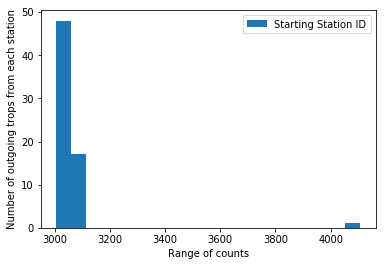

PART B3.2.a
Trip Duration Histogram for the first 90 minutes


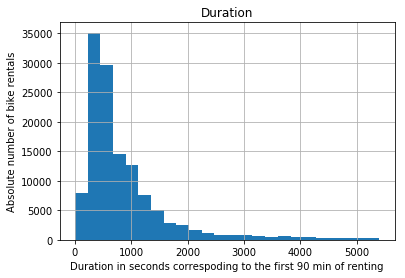

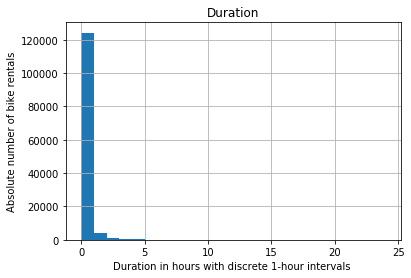

PART B3.2.b


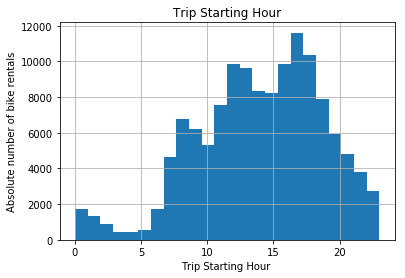

PART B3.3
Trip Route Category by Passholder Type
There are 3 different categories of passholder type [Monthly Pass, Flex Pass, Walk-up]
Categories (3, object): [Monthly Pass, Flex Pass, Walk-up]


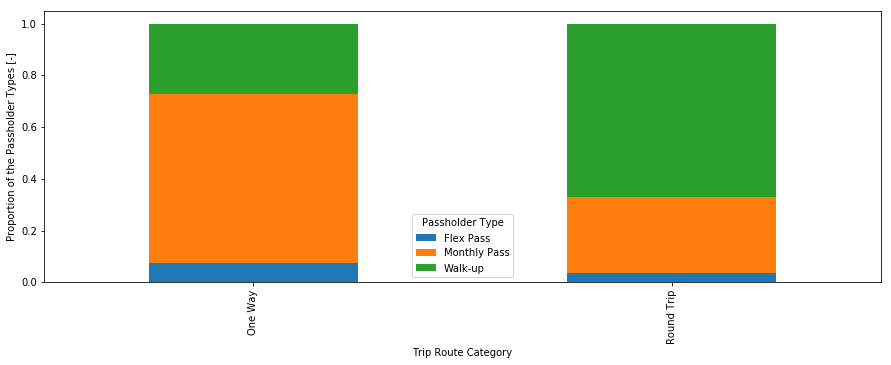

PART B3.4


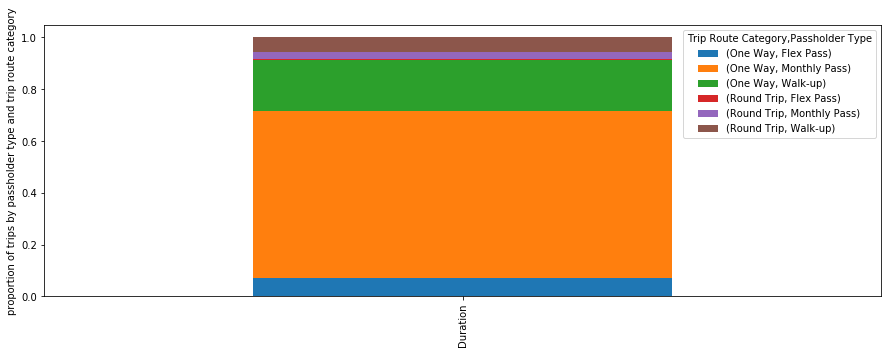

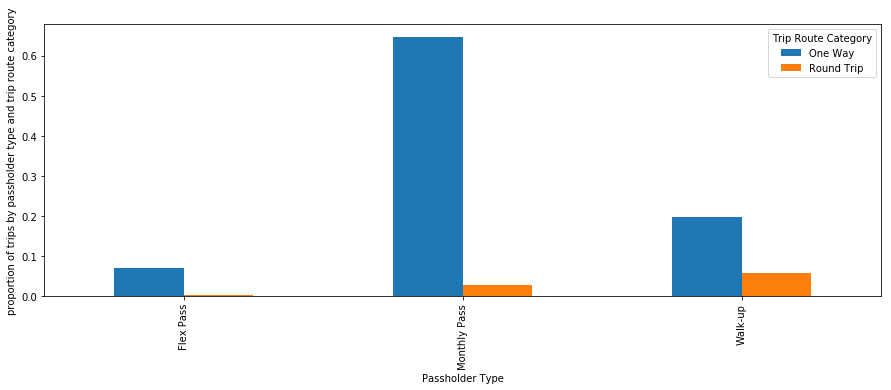

PART B3.5
bikes_metro_df_first is of length:  (71104, 15)
bikes_metro_df_second is of length:  (59611, 15)


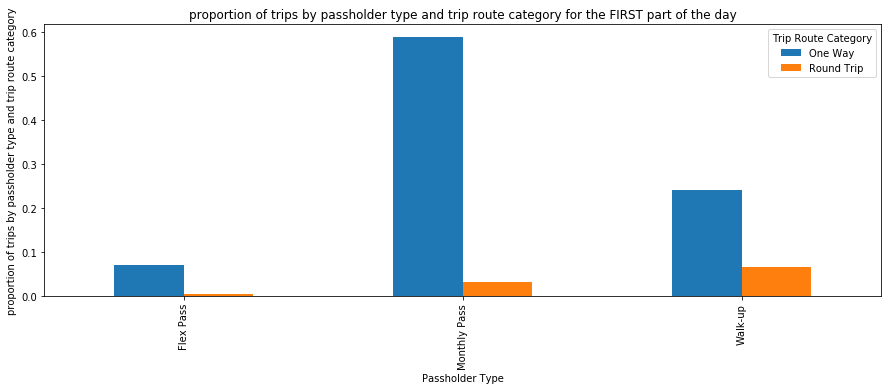

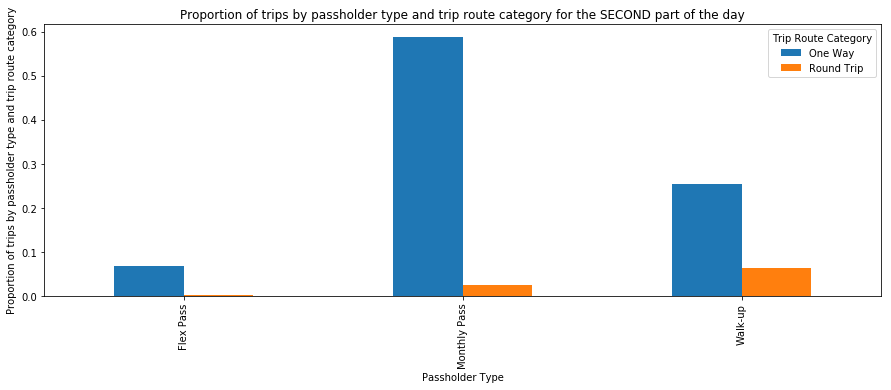

In [19]:
### 1. NUMBER OF OUTGOING TRIPS BY STATION HISTOGRAM
print(bold_start+'PART B3.1'+bold_end)

print('Number of Outgoing Trips by Station Histogram')
bikes_count_df = bikes_metro_df.groupby(['Starting Station ID']).size().reset_index(name='count')
bikes_count_df.plot(x = 'count', kind = 'hist', bins=20)
plt.xlabel('Range of counts')
plt.ylabel('Number of outgoing trops from each station')
plt.show()

print(bold_start+'PART B3.2.a'+bold_end)
### 2a. DURATION HISTOGRAM
#max trip duration is 24h = 1440 minutes
#duration_hours_range = 24
print('Trip Duration Histogram for the first 90 minutes')
# restrict range to 24h since this is a business rule from the metro bikeshare program\n",
bikes_metro_df.hist(column = 'Duration', bins = 24, range = (0, 3600 * 1.5))
plt.xlabel('Duration in seconds correspoding to the first 90 min of renting')
plt.ylabel('Absolute number of bike rentals')
plt.show()

#Here is the discrete 1-hour intervals:
bikes_metro_df_tmp = bikes_metro_df.copy()
bikes_metro_df_tmp.Duration = bikes_metro_df_tmp.Duration/3600
bikes_metro_df_tmp.hist(column = 'Duration', bins = 24, range = (0, 24))
plt.xlabel('Duration in hours with discrete 1-hour intervals ')
plt.ylabel('Absolute number of bike rentals')
plt.show()

print(bold_start+'PART B3.2.b'+bold_end)
### 2b. TRIP STARTING HOUR HISTOGRAM
# trip_start_hours_range =  24
bikes_metro_df['Trip Starting Hour'] = bikes_metro_df['Start Time'].dt.hour
bikes_metro_df.hist(column='Trip Starting Hour', bins=24)
plt.xlabel('Trip Starting Hour ')
plt.ylabel('Absolute number of bike rentals')
plt.show()
bikes_metro_df['Trip Starting Hour'].describe()

### 3. TRIP ROUTE CATEGORY STACKED BAR CHART WITH NORMALIZED HEIGHT
print(bold_start+'PART B3.3'+bold_end)

print('Trip Route Category by Passholder Type')
bikes_trip_category_count_df = bikes_metro_df.groupby(['Trip Route Category', 'Passholder Type']).count()
bikes_trip_category_norm_df = bikes_trip_category_count_df.groupby(['Trip Route Category']).apply(lambda x: x / x.sum()).reset_index()
bikes_trip_category_pivot_df = bikes_trip_category_norm_df.pivot(index='Trip Route Category', columns='Passholder Type', values='Bike ID')

#Graph Normalized Stacked Bar Chart
print('There are 3 different categories of passholder type', bikes_metro_df['Passholder Type'].unique())
bikes_trip_category_pivot_df.loc[:,['Flex Pass', 'Monthly Pass', 'Walk-up']].plot.bar(stacked=True, figsize=(15, 5))
plt.ylabel('Proportion of the Passholder Types [-]')
plt.show()

### 4.
print(bold_start+'PART B3.4'+bold_end)

#only trips that begin in the morning hours
bikes_morning_start_df = bikes_metro_df[(bikes_metro_df['Trip Starting Hour'] > -1) & (bikes_metro_df['Trip Starting Hour'] < 12)]

# Count the frequency of each category and select data of interest
bikes_trip_category_count_df = bikes_morning_start_df.groupby(['Trip Route Category', 'Passholder Type']).count()
bikes_trip_category_count_df = bikes_trip_category_count_df[['Bike ID','Duration']]

# Normalize
bikes_trip_category_norm_df = bikes_trip_category_count_df/bikes_trip_category_count_df.sum()

# Plot A - Shows the data but in a stacked fashion 
bikes_trip_category_norm_df.T.drop('Bike ID').plot.bar(stacked=True, figsize=(15, 5))
plt.ylabel('proportion of trips by passholder type and trip route category')
plt.show()

#Plot B - Shows the data split per subcategories
# Count the frequency of each category and select data of interest
bikes_trip_category_norm_df.unstack(0).Duration.plot.bar( figsize=(15, 5))
plt.ylabel('proportion of trips by passholder type and trip route category')
plt.show()

### 5.Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. 
print(bold_start+'PART B3.5'+bold_end)
#Compute median
median_time = bikes_metro_df['Start Time'].astype('datetime64[ns]').quantile(.5)

#split the data in before and after median_time
bikes_metro_df_first = bikes_metro_df[bikes_metro_df['Start Time'].dt.time < median_time.time()]
bikes_metro_df_second = bikes_metro_df[bikes_metro_df['Start Time'].dt.time >= median_time.time()]

print('bikes_metro_df_first is of length: ', bikes_metro_df_first.shape)
print('bikes_metro_df_second is of length: ', bikes_metro_df_second.shape)

### FOR FIRST PART OF THE DAY ###
# Count the frequency of each category and select data of interest
bikes_trip_category_count_df_first = bikes_metro_df_first.groupby(['Trip Route Category', 'Passholder Type']).count()
bikes_trip_category_count_df_first = bikes_trip_category_count_df_first[['Bike ID','Duration']]

# Normalize
bikes_trip_category_norm_df_first = bikes_trip_category_count_df_first/bikes_trip_category_count_df_first.sum()

# Count the frequency of each category and select data of interest
bikes_trip_category_norm_df_first.unstack(0).Duration.plot.bar( figsize=(15, 5))
plt.ylabel('proportion of trips by passholder type and trip route category')
plt.title('proportion of trips by passholder type and trip route category for the FIRST part of the day')
plt.show()

### FOR SECOND PART OF THE DAY ###
# Count the frequency of each category and select data of interest
bikes_trip_category_count_df_second = bikes_metro_df_second.groupby(['Trip Route Category', 'Passholder Type']).count()
bikes_trip_category_count_df_second = bikes_trip_category_count_df_second[['Bike ID','Duration']]

# Normalize
bikes_trip_category_norm_df_second = bikes_trip_category_count_df_second/bikes_trip_category_count_df_second.sum()

# Count the frequency of each category and select data of interest
bikes_trip_category_norm_df_second.unstack(0).Duration.plot.bar( figsize=(15, 5))
plt.ylabel('Proportion of trips by passholder type and trip route category')
plt.title('Proportion of trips by passholder type and trip route category for the SECOND part of the day')
plt.show()

## QUESTIONS

### B2a. DURATION HISTOGRAM OBSERVATIONS
#### What do you observe in each plot?
Most users take trips of around 0h to 1h, only a few users take trips superior to 1h. We can see some users renting bikes during 2h to 5h. However, we also observe some users taking bikes for 24h. It could be the ones that did not gave back the bike well after the rental.
#### What are some popular values in the duration plot?
The most popular trip duration is approximatly 15 min, most trip durations are below 1 hour. We observe a Gaussian distribution of mean 0.43 hours and a standart deviation of 1.6 hours. We can also see a right handed queue in the distribution meaning that the standart deviation is bigger on this side of the duration.
#### Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior.
* We observe that the most popular duration is one hour or less. In fact, people usually use bike for short displacements. This could indicated that they migth not want to be exhausted after their bike trip and thus it is logical that the majority of the duration are below one hour.
* Morever, we observe that some durations are between more than one hour and 5 hours. This makes sense. Some people migth use the bikes for a long trips but it's not the majority. Moreover, in this range of value, some people could keep the bike even if they are not using it to be sure to have one for the way back.
* Finally, we observe that some durations are centered between 23 hours and 24 hours. This could be due to the people that did not gave back well their bikes.

### B2b. TRIP STARTING HOUR HISTOGRAM OBSERVATIONS
#### What do you observe in each plot?
The plot shows an increasing number trips starting from 5 am. This means that the first users start to use the bike from 5 am. The number of rentals then increases until 5 pm where the distribution reaches its maximum. Then, starting from 5pm, the number of rentals decreases steadily until 4 am on the day after.
#### What are some popular values in the duration plot?
The absolute number of trips starting hours spikes at (8am), 12 noon, and 5pm. We decide to mention the peak at 8 am since it is observable from the data. However it is only a local maxima since later in the day there are many hours in which the number of rentals is higher. 

#### Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior.
We observe a local maxima at 8am, 1pm, and 5pm because popular trip starting times tend towards the early morning, afternoon, and evening. For example, people may choose to take a bike trip to get to work around 8am, go out for lunch at 12 noon, and get home at 5pm. As the daylight intensity decreases and the sun starts to set after 7pm, the frequency of trips starting rapidly decreases. Biking in the dark may not be generally desirable.

### B3.5
Q1: Does the proportion of trips depend on whether it is the first or second hour interval?
    - No the proportion do almost not change between the first and the second hour interval as it could be shown on the two graphs. 
Q2: Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? 
    - Since the distributions are almost the same between both intervals it does not seems to make any sens to change the pricing. It is worthwhile to mention that the first interval is much longuer then the second interval (15.5 hours vs 8.5 hours for the second one). Hence, changing the pricing could favor the bike rental in the first time interval. Hence, since the distribution is the same in both intervals it makes not sense to implement a different pricing since the money that the company will gain by earning more in the evenings will be compensted by the money they lose in the morning. 

__\* Briefly explain your approach for every query here \*__
#### 1 - Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins 
Each Starting Station corresponds to a unique *Starting Station ID*. Thus, the number of outgoing trips from each station corresponds to the count of each unique *Starting Station IDs*. This data is visualized via a histogram type plot where the number of bins is set to 20. 
#### 2a - Duration Histogram
The Duration attribute from the datasource corresponds to trip durations. Since the trip duration limit is capped by the Metro Bike Share Program at 24h, setting the number of bins in the histogram to 24 will result in discrete 1-h intervals being used in the plot. The range of the histogram plot is set from 0 to 24h. In the histogramms we also chose to play a bit with the number of bins in order to convey a cleaer message (sometime 1-hour bins, sometimes 90-minutes bins. 
#### 2b - Trip Start Hour Histogram
The Trip Starting Hour column corresponds to Trip Staring Hour in the Day data. Since one day consists of 24h, the number of bins is once again set to 24 to produce descrete 1-h intervals in the histogram plot. It was important here to take the *Start Time* information since we want to know when we rent the bikes. (For instance, on could also take the *Ending Time* data but this would have been less accurate).
#### 3 - Trip Route Category by Passholder Type Stacked Bar Chart
We start by finding the size of the *Trip Route Category* and *Passholder Type* attributes, via which we normalize the data by finding the proportionate number of trips by *Passholder Types* respectively (using the lambda x: x / x.sum() function) over the total count of trips by *Trip Route Category*. To allow the data to be visualized as a stacked bar chart by *Passholder Type*, we apply pivot on the *Passholder Type* column. Stacked is set to True to produce a plot with a stacked bar chart.
#### 4 - Single bar chart the proportion of trips by passholder type and trip route category
In this question, it was necessary to group the data not only by one value but by two values switch were the *trip route category* and the *passholder type*. This made it possible to combine and get the absolute amount of rentals. In a second time, this absolute rentals number was normalized by dividing by the total number of rentals. Finally, a bar chart showing the results was plotted. 
#### 5 - Calculate and present the proportion of trips by passholder type and trip route category
First, we computed the median which enabled us to find the time at which half of the bike were rent. This showed us that we rent the half of the bike at around 3:51 pm. (We chose to take the *Start Time* and not the *Ending time* since we are interested in changing the pricing as soon as the ~50% first bike leave the rental store, not once they come back). By using the dt.time() function of pandas we could easily compare hours and minutes of a given day without having to care about the day at which the data was registered. Finally, the plot part is the same as in part 4. 